In [1]:
# <!-- collapse=True -->
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('font', size=14)
plt.rc('axes', labelsize=18)

#params = {'legend.fontsize': 'x-large',
#          'figure.figsize': (15, 5),
#         'axes.labelsize': 'x-large',
#         'axes.titlesize':'x-large',
#         'xtick.labelsize':'x-large',
#         'ytick.labelsize':'x-large'}
#pylab.rcParams.update(params)

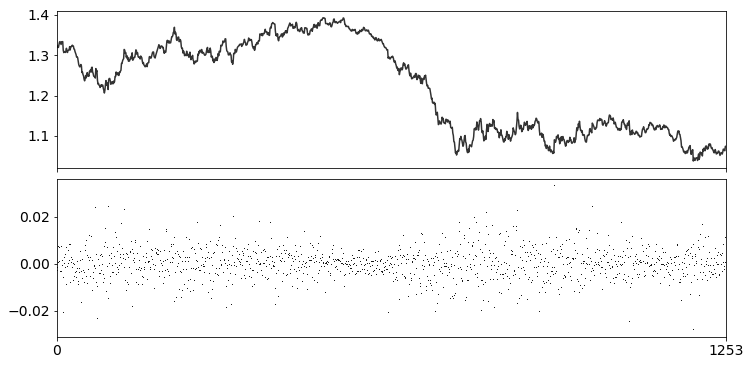

In [6]:
# <!-- collapse=True -->
data = np.load('./timeseriesdata.npy', encoding='bytes').item()
X, Y = data['DEXUSEU.csv']

dY = np.diff( Y, 1)

n_graph = 2
fig, ax = plt.subplots(n_graph, sharex=True, figsize=(12, 3*n_graph));

ax[0].plot(  Y ,  '-k', alpha=0.8  );
#ax[0].set_yticks([0, 160]);

ax[1].plot(  np.diff(Y) ,  ',k', alpha=0.9  );
#ax[1].set_yticks([-10, 0, 10]);
ax[1].set_xlim([0, len(Y)]);

plt.subplots_adjust(wspace=0, hspace=.07);
ax[-1].set_xticks([0, len(Y)]);

In [9]:
def autocorrelation(x):
    """
    Compute the autocorrelation of the signal, based on the properties of the
    power spectral density of the signal.
    http://stackoverflow.com/a/40154897
    """
    xp = x - np.mean(x)
    f = np.fft.fft(xp)
    p = np.array([np.real(v)**2+np.imag(v)**2 for v in f])
    p = np.absolute( f )**2
    pi = np.fft.ifft(p)
    
    return np.real(pi)[:int(x.size/2)]/np.sum(xp**2)

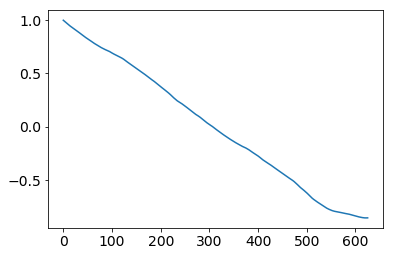

In [11]:
corY = autocorrelation( Y )
plt.plot( corY  );

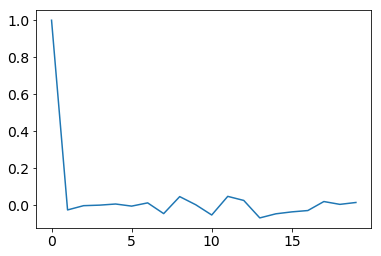

In [13]:
corY = autocorrelation( dY )
plt.plot( corY[:20] );

In [33]:
def movingStd( X, n=200 ):
    
    std = []
    for i in range( len(X)-n ):
        std.append( np.mean( X[i:i+n] ) )
        
    return np.array( std )
    

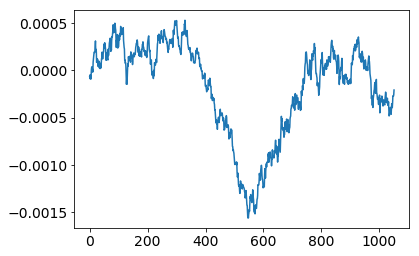

In [34]:
plt.plot( movingStd( dY ) )

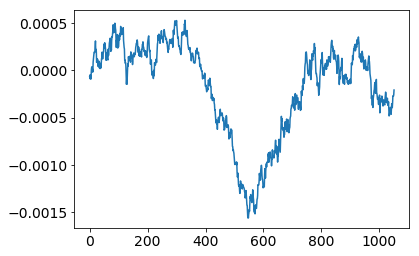

In [42]:
n = 200
rolling_std = []
rolling_mean = []

X = dY 
for i in range( n, len(X) ):
    rolling_std.append( np.std( X[i-n:i] ) )
    rolling_mean.append( np.mean( X[i-n:i] ) )

    
plt.plot(  rolling_mean  )

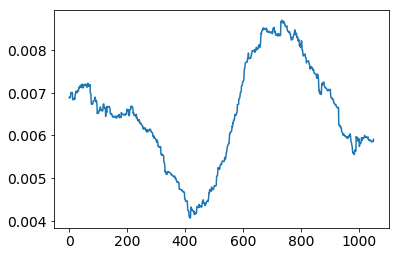

In [51]:
plt.plot(  rolling_std )

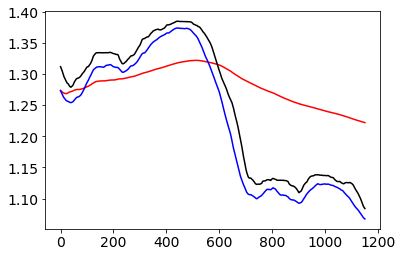

In [66]:
n = 100
rolling_mean = []
rolling_std = []

overall_mean = []
overall_std = []

X = Y 
for i in range( n, len(X) ):
    overall_mean.append( np.mean( X[0:i] ) )
    overall_std.append( np.std( X[0:i] ) )
    rolling_mean.append( np.mean( X[i-n:i] ) )
    rolling_std.append( np.std( X[i-n:i] ) )

    
plt.plot(  overall_mean, 'r'  )
plt.plot(  rolling_mean, 'b' )
plt.plot(  np.array(rolling_mean)+np.array(rolling_std), 'k' )

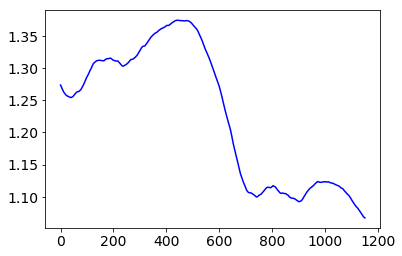

In [67]:
plt.plot(  rolling_mean, 'b' )

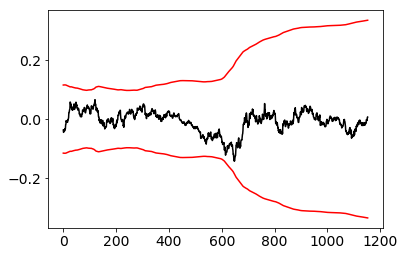

In [68]:
plt.plot(  3*np.array(overall_std), 'r' )
plt.plot(  -3*np.array(overall_std), 'r' )

plt.plot(  -np.array(rolling_mean)+np.array(Y[n:]), 'k' )

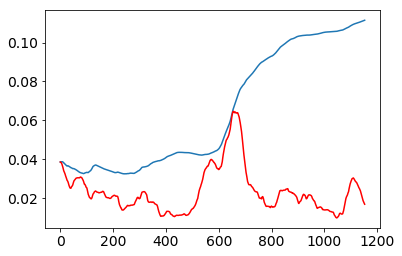

In [74]:
plt.plot(  np.array(overall_std) )
plt.plot( np.array(rolling_std), 'r' )

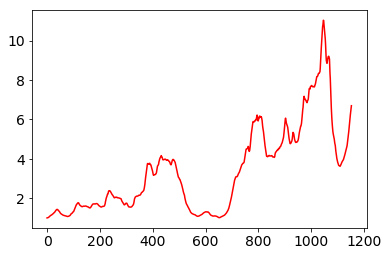

In [76]:
plt.plot(  np.array(overall_std)/np.array(rolling_std), 'r' )